In [1]:
import pandas as pd

In [2]:
import numpy as np

In [64]:
start_date='2020-01-01'
end_date= '2022-12-31'

In [65]:
dates=pd.date_range(start=start_date,end=end_date,freq='M')

In [66]:
sales=np.random.randint(low=1000,high=5000,size=len(dates))

In [67]:
df = pd.DataFrame({'Date': dates, 'Sales': sales})

In [68]:
df.head()

,Date,Sales
0,2020-01-31,3776
1,2020-02-29,2952
2,2020-03-31,1128
3,2020-04-30,1284
4,2020-05-31,3869


In [69]:
import matplotlib.pyplot as plt

In [70]:
df.dtypes

Date     datetime64[ns]
Sales             int32
dtype: object

In [71]:
data=df

In [77]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [78]:
from datetime import datetime

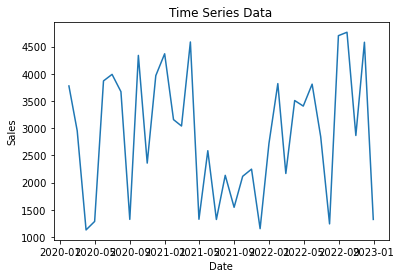

In [80]:
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Data')
plt.show()


In [74]:
from statsmodels.tsa.stattools import adfuller

In [81]:
result = adfuller(data)

In [84]:
adf_statistic= result[0]
p_value=result[1]

In [85]:
print("ADF Statistic:",adf_statistic)
print("p_value:",p_value)

ADF Statistic: -2.8915750150108352
p_value: 0.0463365168055551


In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [111]:
from statsmodels.tsa.stattools import acf,pacf

In [117]:
acf_vals=acf(sales,nlags=20)
pacf_vals=pacf(sales,nlags=16)

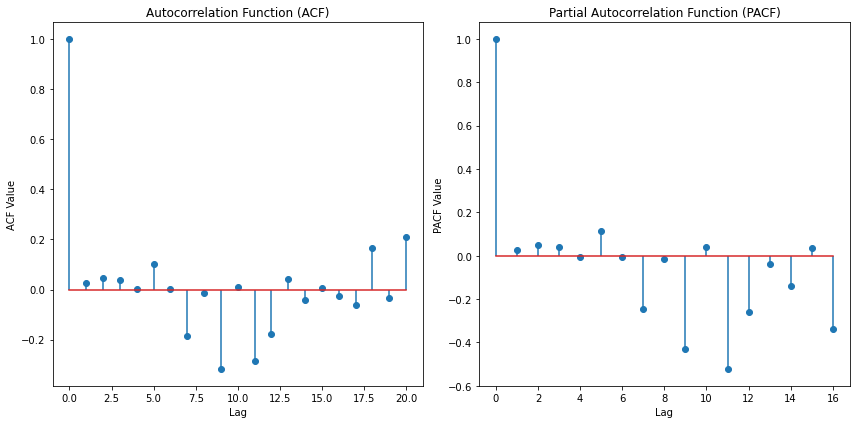

In [119]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(range(len(acf_vals)), acf_vals)
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plt.stem(range(len(pacf_vals)), pacf_vals)
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [121]:
order = (1, 0, 1)  
model = ARIMA(sales, order=order)
model_fit = model.fit()

In [122]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -305.484
Date:                Mon, 01 May 2023   AIC                            618.968
Time:                        19:30:12   BIC                            625.302
Sample:                             0   HQIC                           621.179
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2887.6939    212.725     13.575      0.000    2470.760    3304.628
ar.L1          0.5749      2.701      0.213      0.831      -4.719       5.869
ma.L1         -0.5346      2.794     -0.191      0.8

In [123]:
forecast_steps = 12  # Number of steps ahead to forecast
forecast = model_fit.forecast(steps=forecast_steps)

In [124]:
print(forecast)

[2875.98204615 2880.96114858 2883.82347195 2885.46892818 2886.41484722
 2886.95862519 2887.27122538 2887.45092902 2887.55423477 2887.61362188
 2887.64776158 2887.66738739]
